# Theory 

**1. Concept of Batch Normalization:**

In neural networks, as data flows through each layer, the distribution of inputs to each layer can change, which can make training difficult. Batch normalization addresses this problem by normalizing the inputs to each layer. It operates on a per-mini-batch basis, hence the name "batch" normalization.

**2. Benefits of Using Batch Normalization:**

Batch normalization offers several advantages during training and contributes to more stable and faster convergence of deep neural networks. Some of the key benefits include:

- **Accelerated Training:** Batch normalization speeds up training by reducing the risk of vanishing/exploding gradients. It allows you to use higher learning rates, resulting in faster convergence.

- **Stabilized Activation Distributions:** It helps keep the distribution of activations closer to zero mean and unit variance, which can prevent saturation of activation functions and, consequently, improve training.

- **Reduced Sensitivity to Initialization:** Neural networks with batch normalization are less sensitive to the initial choice of weights, making training more robust.

- **Regularization Effect:** Batch normalization has a slight regularization effect because it adds noise to the activations, acting similarly to dropout, which can reduce overfitting.

- **Improved Generalization:** Models trained with batch normalization tend to generalize better on unseen data.

**3. Working Principle of Batch Normalization:**

Batch normalization operates on a per-mini-batch basis during training. It involves two main steps: normalization and learnable parameters (scaling and shifting).

**Normalization Step:**

For each feature (channel) in a mini-batch, batch normalization standardizes the values. The process for a single feature is as follows:

1. Calculate the mean (average) and variance of the feature activations over the mini-batch.
2. Normalize the feature by subtracting the mean and dividing by the standard deviation (with an added small constant for numerical stability).

Mathematically, for a feature `x` in a mini-batch:

\[
\hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}
\]

Where:
- \(\hat{x}\) is the normalized feature.
- \(x\) is the original feature.
- \(\mu\) is the mean of the feature over the mini-batch.
- \(\sigma\) is the variance of the feature over the mini-batch.
- \(\epsilon\) is a small constant (usually a small positive value like \(1 \times 10^{-5}\)) for numerical stability.

**Learnable Parameters:**

In addition to normalization, batch normalization introduces two learnable parameters for each feature: scale (\(\gamma\)) and shift (\(\beta\)).

After normalizing the feature, it is rescaled and shifted as follows:

\[
y = \gamma \hat{x} + \beta
\]

Where:
- \(y\) is the final output of the batch normalization for the feature.
- \(\gamma\) is a learnable scaling parameter.
- \(\beta\) is a learnable shifting parameter.

These scale and shift parameters allow the network to learn the optimal scale and shift for each feature, which can be essential for capturing complex patterns.



# Implementation

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
mnist = tf.keras.datasets.mnist

(X_train , y_train ) , (X_test , y_test) = mnist.load_data()

In [3]:
X_valid , X_train = X_train[:5000]/255. , X_train[5000:]/255.
y_valid , y_train = y_train[:5000]/255. , y_train[5000:]/255.

X_test = X_test / 255.




In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]  , name = "inputLayer"),
    tf.keras.layers.Dense(500 , activation='relu',name = "hiddenLayer1"),
    tf.keras.layers.Dense(300 , activation='relu' , name = "hiddenLayer2"),
    tf.keras.layers.Dense(100 , activation='relu' , name = "hiddenLayer3"),
    tf.keras.layers.Dense(10 , activation='softmax' , name = "Outputlayer"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 500)               392500    
                                                                 
 hiddenLayer2 (Dense)        (None, 300)               150300    
                                                                 
 hiddenLayer3 (Dense)        (None, 100)               30100     
                                                                 
 Outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 573910 (2.19 MB)
Trainable params: 573910 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
loss_function = "sparse_categorical_crossentropy"
optimizer = 'adam'
metrics = ['accuracy']

model.compile(loss = loss_function, optimizer = optimizer , metrics = metrics)

In [11]:
epochs = 30
validation_set = (X_valid , y_valid)

history1 = model.fit(X_train , y_train , epochs=epochs , validation_data=validation_set , batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 18s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 17s 10ms/step - loss

In [12]:
history1_df = pd.DataFrame(history1.history)

In [14]:
history1_df

,loss,accuracy,val_loss,val_accuracy
0,0.0,0.098982,0.0,0.0958
1,0.0,0.098982,0.0,0.0958
2,0.0,0.098982,0.0,0.0958
3,0.0,0.098982,0.0,0.0958
4,0.0,0.098982,0.0,0.0958
5,0.0,0.098982,0.0,0.0958
6,0.0,0.098982,0.0,0.0958
7,0.0,0.098982,0.0,0.0958
8,0.0,0.098982,0.0,0.0958
9,0.0,0.098982,0.0,0.0958


In [15]:
model_BN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]  , name = "inputLayer"),
    tf.keras.layers.Dense(500 , activation='relu',name = "hiddenLayer1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300 , activation='relu' , name = "hiddenLayer2"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100 , activation='relu' , name = "hiddenLayer3"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10 , activation='softmax' , name = "Outputlayer"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 500)               392500    
                                                                 
 hiddenLayer2 (Dense)        (None, 300)               150300    
                                                                 
 hiddenLayer3 (Dense)        (None, 100)               30100     
                                                                 
 Outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 573910 (2.19 MB)
Trainable params: 573910 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model_BN.compile(loss = loss_function, optimizer = optimizer , metrics = metrics)

In [17]:
history_BN = model_BN.fit(X_train , y_train , epochs=epochs , validation_data=validation_set , batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 23s 11ms/step - loss: 0.1141 - accuracy: 0.0967 - val_loss: 5.7053e-04 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 17s 10ms/step - loss: 2.7588e-04 - accuracy: 0.0990 - val_loss: 1.1720e-04 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 18s 10ms/step - loss: 6.9858e-05 - accuracy: 0.0990 - val_loss: 3.6298e-05 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 18s 10ms/step - loss: 2.3419e-05 - accuracy: 0.0990 - val_loss: 1.3172e-05 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 18s 11ms/step - loss: 8.6380e-06 - accuracy: 0.0990 - val_loss: 5.0136e-06 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 18s 11ms/step - loss: 3.3192e-06 - accuracy: 0.0990 - val_loss: 1.9311e-06 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 19s 11ms/step - loss: 1.

In [19]:
BN_history = pd.DataFrame(history_BN.history)

In [20]:
BN_history

,loss,accuracy,val_loss,val_accuracy
0,1.140905e-01,0.096727,5.705334e-04,0.0958
1,2.758782e-04,0.098982,1.172015e-04,0.0958
2,6.985782e-05,0.098982,3.629830e-05,0.0958
3,2.341921e-05,0.098982,1.317202e-05,0.0958
4,8.637988e-06,0.098982,5.013601e-06,0.0958
5,3.319156e-06,0.098982,1.931095e-06,0.0958
6,1.299966e-06,0.098982,7.677078e-07,0.0958
7,5.112821e-07,0.098982,2.934933e-07,0.0958
8,1.617735e-07,0.098982,5.710124e-08,0.0958
9,2.696947e-08,0.098982,2.932548e-09,0.0958


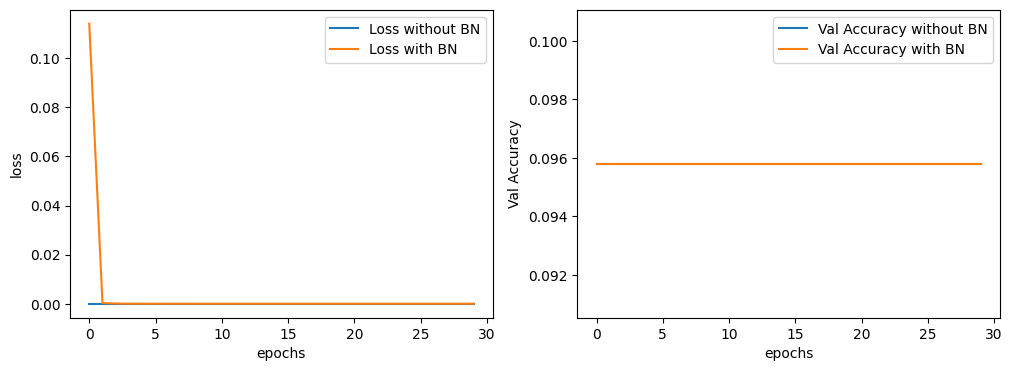

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history1_df['loss'] , label ='Loss without BN')
plt.plot(BN_history['loss'] , label ='Loss with BN')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history1_df['val_accuracy'] , label ='Val Accuracy without BN')
plt.plot(BN_history['val_accuracy'] , label ='Val Accuracy with BN')
plt.xlabel('epochs')
plt.ylabel('Val Accuracy')
plt.legend()

# Experimentation

Training with batch size: 32
Epoch 1/10
1719/1719 [==============================] - 17s 9ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 4/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 5/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 7/10
1719/1719 [==============================]

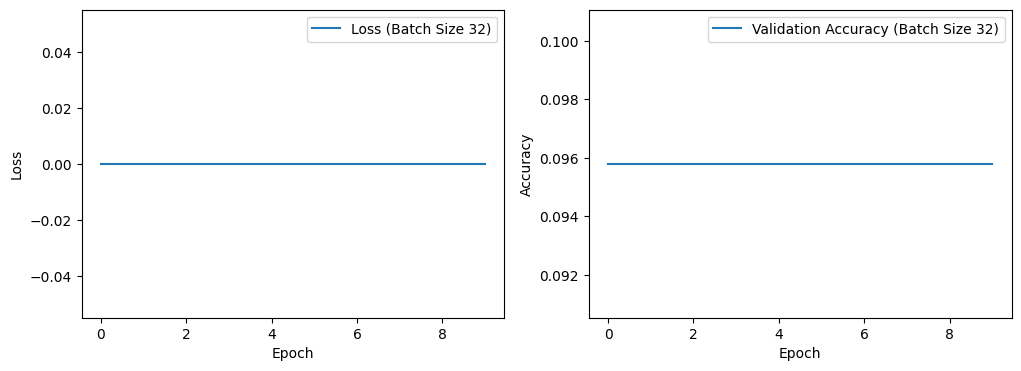

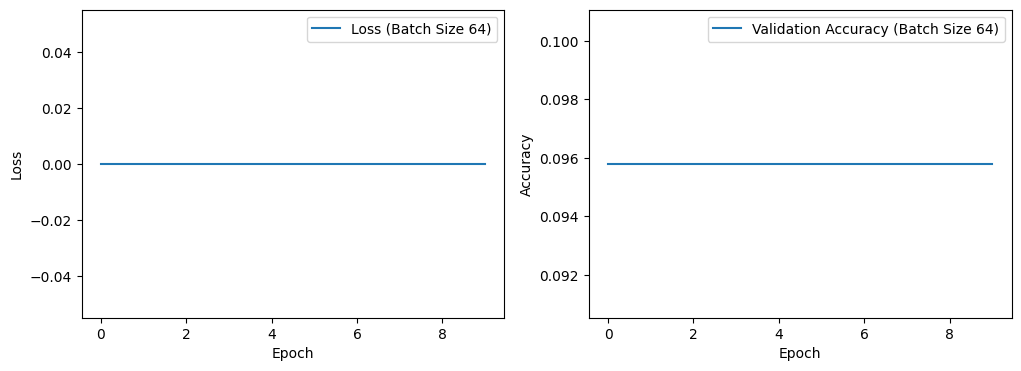

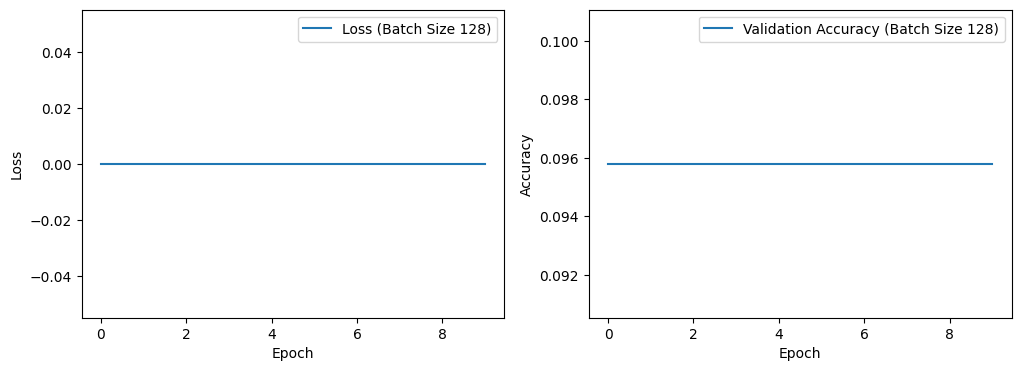

In [26]:
from tensorflow.keras import layers
batch_sizes = [32, 64, 128]

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    
    model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]  , name = "inputLayer"),
    tf.keras.layers.Dense(500 , activation='relu',name = "hiddenLayer1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300 , activation='relu' , name = "hiddenLayer2"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100 , activation='relu' , name = "hiddenLayer3"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10 , activation='softmax' , name = "Outputlayer"),
])


    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10,
                        validation_data= validation_set)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label=f'Loss (Batch Size {batch_size})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (Batch Size {batch_size})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()
